Copyright (C) 2023 201800294_DongilKim All rights reserved <U>_(https://KimTein.github.io)_</U>

Ch_17_assignment

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ordinary Differential Equation

## Population Growth Programming

In [24]:
import numpy as np

N_0 : 100.00, r : 0.10, dt : 1.00, N_t: 20.00


Text(0.5, 0, 't')

Text(0, 0.5, 'N(t)')

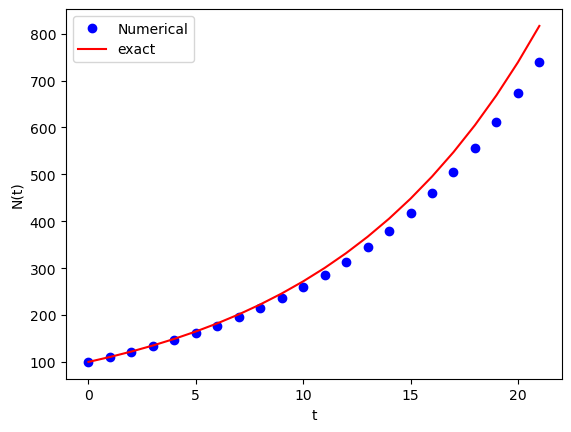

In [25]:
N_0 = int(input('Give initial populatioin size N_0: '))
r = float(input('Give net growth rate r: '))
dt = float(input('Give time step size: '))
N_t = int(input('Give number of steps: '))

print("N_0 : %.2f, r : %.2f, dt : %.2f, N_t: %.2f" %(N_0, r, dt, N_t))
from numpy import linspace, zeros
t = linspace(0, (N_t+1) * dt, N_t+2)
N = zeros(N_t+2)

N[0] = N_0
for n in range(N_t+1):
    N[n+1] = N[n] + r*dt*N[n]
    
import matplotlib.pyplot as plt
numerical_sol = 'bo' if N_t < 70 else 'b-'
plt.plot(t, N, numerical_sol, t, N_0*np.exp(r*t), 'r-')
plt.legend(['Numerical', 'exact'], loc = 'upper left')
plt.xlabel('t'); plt.ylabel('N(t)')
filestem = 'growth1_%dsteps' %N_t
plt.savefig('%s.png' % filestem); plt.savefig('%s.pdf' % filestem)

N_0 : 100.00, r : 0.10, dt : 0.05, N_t: 400.00


Text(0.5, 0, 't')

Text(0, 0.5, 'N(t)')

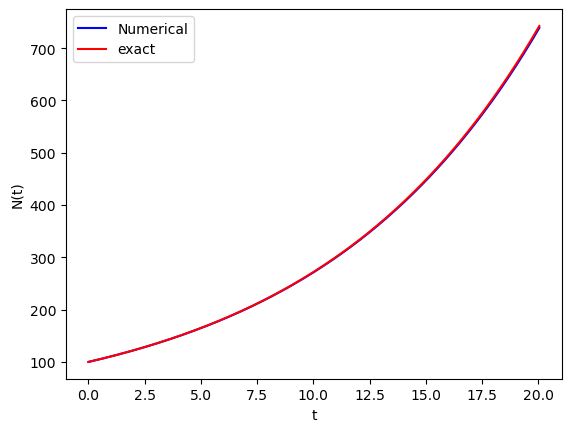

In [26]:
N_0 = int(input('Give initial populatioin size N_0: '))
r = float(input('Give net growth rate r: '))
dt = float(input('Give time step size: '))
N_t = int(input('Give number of steps: '))

print("N_0 : %.2f, r : %.2f, dt : %.2f, N_t: %.2f" %(N_0, r, dt, N_t))
from numpy import linspace, zeros
t = linspace(0, (N_t+1) * dt, N_t+2)
N = zeros(N_t+2)

N[0] = N_0
for n in range(N_t+1):
    N[n+1] = N[n] + r*dt*N[n]
    
import matplotlib.pyplot as plt
numerical_sol = 'b-' if N_t < 70 else 'b-'
plt.plot(t, N, numerical_sol, t, N_0*np.exp(r*t), 'r-')
plt.legend(['Numerical', 'exact'], loc = 'upper left')
plt.xlabel('t'); plt.ylabel('N(t)')
filestem = 'growth2_%dsteps' %N_t
plt.savefig('%s.png' % filestem); plt.savefig('%s.pdf' % filestem)

## General ODE case

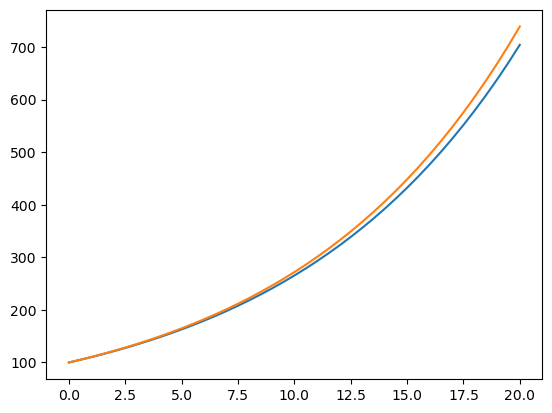

In [27]:
# ode_FE.py
from numpy import linspace, zeros, exp
import matplotlib.pyplot as plt

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    u = zeros(N_t+1)
    t = linspace(0, N_t *dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f(u[n], t[n])
    return u, t

def demo_polulation_growth():
    """Test case : u=r*u, u(0) = 100 """
    
    def f(u, t):
        return 0.1*u
    
    u, t = ode_FE(f=f, U_0 = 100, dt = 0.5, T=20)
    plt.plot(t, u, t, 100*exp(0.1*t))
    plt.show()
    
if __name__ == '__main__':
    demo_polulation_growth()

### More realistic model

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 't')

Text(0, 0.5, 'N(t)')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 't')

Text(0, 0.5, 'N(t)')

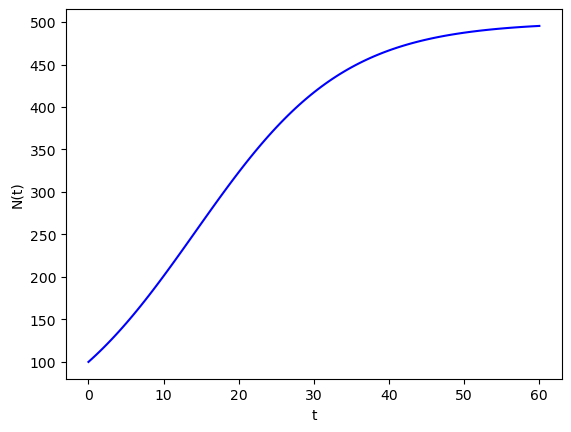

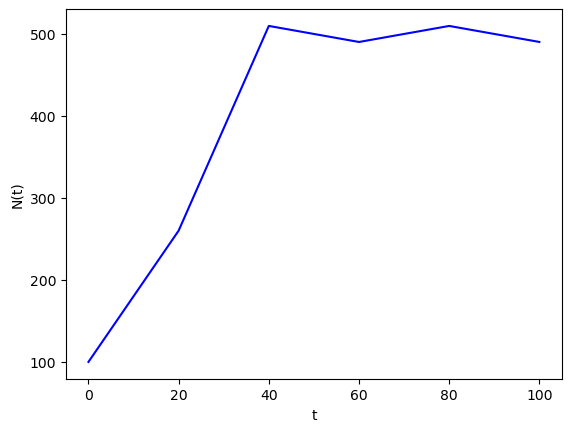

In [28]:
from ode_FE import ode_FE
import matplotlib.pyplot as plt

for dt, T in zip((0.5, 20), (60, 100)):
    u, t = ode_FE(f=lambda u, t: 0.1*(1-u/500.) *u, 
                  U_0 = 100, dt=dt, T=T)
    plt.figure() # Make separate figures for each pass in the loop
    plt.plot(t, u, 'b-')
    plt.xlabel('t'); plt.ylabel('N(t)')
    plt.savefig('tmp_%g.png' %dt); plt.savefig('tmp_%g.pdf' %dt)

## Importing Modules

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

sympy.init_printing()

## Symbolic Solution to ODEs

### Newton's cooling law

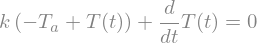

In [30]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")

ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode, 0) # Eq(ode) -> Eq(ode, 0)

ode_sol = sympy.dsolve(ode)
ode_sol

In [31]:
ode_sol = sympy.dsolve(ode)
ode_sol

ode_sol.lhs
ode_sol.rhs

ics = {T(0): T0}
ics

C_eq = ode_sol.subs(t, 0).subs(ics)
C_eq

In [32]:
C_sol = sympy.solve(C_eq)
C_sol

ode_sol.subs(C_sol[0])

## Numerical Integraion of ODEs

### Example.1

Text(0.5, 0, 'time')

Text(0, 0.5, 'y(t)')

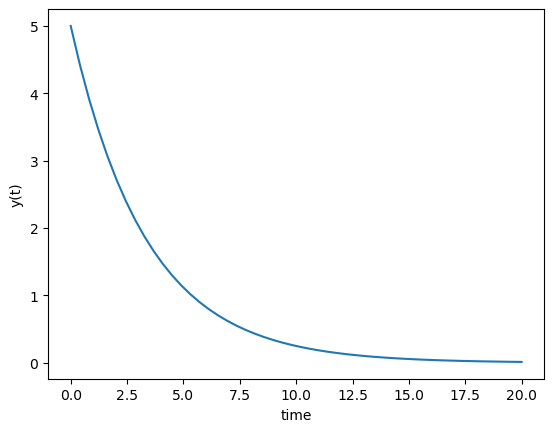

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y, t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0, 20)
y = odeint(model, y0, t)

# plot results
plt.plot(t, y)
plt.xlabel('time'); plt.ylabel('y(t)')
plt.show()


### Example.2

In [34]:
# https://colab.research.google.com/github/jrjohansson/numerical-python-book-code/blob/master/ch09-code-listing.ipynb#scrollTo=sqzc7DWOrWhd
def  plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    
    return ax

<Axes: title={'center': '$\\frac{d}{d x} y{\\left(x \\right)} = x + y^{2}{\\left(x \\right)}$'}>

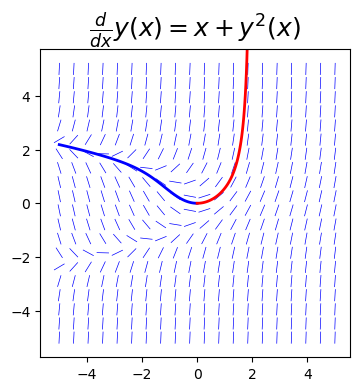

In [35]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x) ** 2 + x

f_np = sympy.lambdify((y(x), x), f)

# positive directions
y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)

# negative directions
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_direction_field(x, y(x), f, ax= ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

<Axes: title={'center': '$\\frac{d}{d x} y{\\left(x \\right)} = x + y^{2}{\\left(x \\right)}$'}>

<Axes: title={'center': '$\\frac{d}{d x} y{\\left(x \\right)} = - \\frac{x}{y{\\left(x \\right)}}$'}>

<Axes: title={'center': '$\\frac{d}{d x} y{\\left(x \\right)} = \\frac{y^{2}{\\left(x \\right)}}{x}$'}>

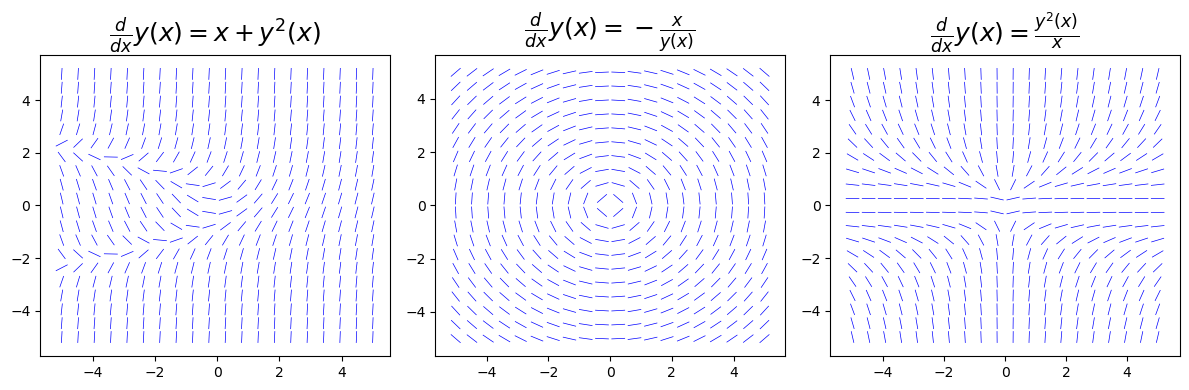

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])

fig.tight_layout()
# fig.savefig('ch9-direction-field.pdf')


*****************************************************************************
Reference<br>
*    Title: Physics Programming Lecture Note (INU)
*    Author: Jeongwoo Kim, Ph.D.
*    Availability: https://sites.google.com/view/jeongwookim
  
****************************************************************************

Copyright (C) 2023 201800294_DongilKim All rights reserved <U>_(https://KimTein.github.io)_</U>